In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly_express as px
from importlib import reload

In [2]:
NOTEBOOK_DIR = os.getcwd()

### Basic Binary Classifier (SGD) for MNIST digits

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist["data"].values, mnist["target"].astype(np.uint8)

In [18]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

5

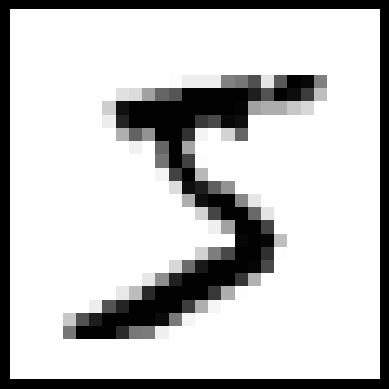

In [19]:
sample_digit = X[0]
plot_digit(sample_digit)
y[0]

In [48]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# # Can use this if data not properly shuffled and stratified like MNIST:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6/7, random_state=0)

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([sample_digit])

array([ True])

### Cross-validation and Eval

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
# Baseline
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
# print(any(dummy_clf.predict(X_train)))

cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [40]:
# Same effect as cross_val_score above but allows for more tweaks if needed.
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    # print(train_index)
    # print(test_index)
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

In [52]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred); cm
# cm = confusion_matrix(y_train_5, y_train_pred, normalize="true"); cm

array([[53892,   687],
       [ 1891,  3530]])

In [71]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [73]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [76]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [78]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [80]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

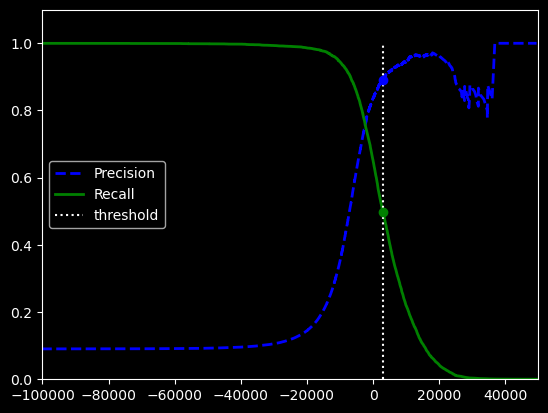

In [110]:
threshold = 3000
idx = (thresholds >= threshold).argmax() 

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "w", "dotted", label="threshold")
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-100000, 50000, 0, 1.1])
# plt.grid(color="grey")
plt.legend(loc="center left");

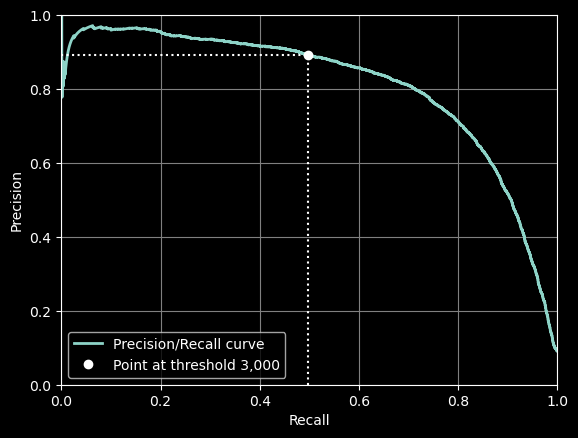

In [ ]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "w:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "w:")
plt.plot([recalls[idx]], [precisions[idx]], "wo",
         label="Point at threshold 3,000")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid(color="grey")
plt.legend(loc="lower left");